感度カーブ比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# import SPICE user lib
import lappy as laplib

plt.rcParams["font.size"] = 10

Observation parameters

In [2]:
# Observation parameters
flux_p =  1.0e-15     # erg/cm2/s/A
tau    =  3600.0      # second

Read spec

In [3]:
lap = laplib.get_lap_spec()
hst = laplib.get_hst_spec()
uvex = laplib.get_uvex_spec()
[lap_wl, lap_ae] = laplib.get_lap_ae()
[hst_wl, hst_ae] = laplib.get_hst_ae()
[uvex_wl, uvex_ae] = laplib.get_uvex_ae()

Point source sensitivity [(counts/s/pix) / (erg/cm2/s/A)]

In [4]:
# LAPYUTA
[lap_sp, lap_sd] = laplib.get_sensitivity(lap, lap_ae, lap_wl)

# HST
[hst_sp, hst_sd] = laplib.get_sensitivity(hst, hst_ae, hst_wl)

# UVEX
[uvex_sp, uvex_sd] = laplib.get_sensitivity(uvex, uvex_ae, uvex_wl)

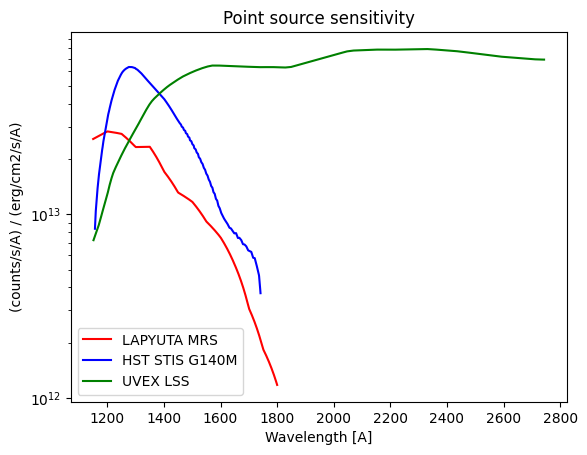

In [6]:
plt.plot(lap_wl, lap_sp/lap.d, 'r-', label=lap.description)
plt.plot(hst_wl, hst_sp/hst.d, 'b-', label=hst.description)
plt.plot(uvex_wl, uvex_sp/uvex.d, 'g-', label=uvex.description)
plt.ylabel('(counts/s/A) / (erg/cm2/s/A)')

#plt.plot(lap_wl, lap_sp, 'r-', label=lap.description)
#plt.plot(hst_wl, hst_sp, 'b-', label=hst.description)
#plt.ylabel('(counts/s/pix) / (erg/cm2/s/A)')

plt.yscale('log')
plt.title('Point source sensitivity')
plt.xlabel('Wavelength [A]')
plt.legend()

Geocorona

In [6]:
# For HST [erg/s/cm2/arcsec2/A] -> [counts/s]
I_Lya = 6.1e-13   # 20kR (HST daytime)
I_1304  = 5.7e-14 # 2kR  (HST daytime)
I_1356  = 5.0e-15 # 0.2kR(HST daytime)

I_hst = laplib.get_geocorona(I_Lya, I_1304, I_1356, hst_wl)

hst_n_cr_gc = I_hst * hst_sd * hst.n_s * hst.n_w  # [counts/s]

# For LAPYUTA [erg/s/cm2/arcsec2/A] -> [counts/s]
I_Lya = 6.1e-14   # 2kR (HST daytime / 10)
I_1304  = 5.7e-17 # 2R  (HISAKI daytime)
I_1356  = 0.0
I_lap = laplib.get_geocorona(I_Lya, I_1304, I_1356, lap_wl)
lap_n_cr_gc = I_lap * lap_sd * lap.n_s * lap.n_w  # [counts/s]

#plt.plot(lap_wl, I_lap, 'r', label="H Ly-a")
#plt.title('Geo corona')
#plt.ylabel('erg/s/cm2/arcsec2/A')
##plt.ylabel('erg/s/cm2/arcsec2/A')
##plt.yscale('log')
#plt.xlim([1215.55,1215.80])

In [7]:
#plt.plot(hst_wl, hst_n_cr_gc, 'b', label=hst.description)
#plt.plot(lap_wl, lap_n_cr_gc, 'r', label=lap.description)
#plt.title('Geo corona')
#plt.ylabel('counts/s')
##plt.ylabel('erg/s/cm2/arcsec2/A')
##plt.yscale('log')
##plt.xlim([1215.8, 1216.2])

Count rate

In [8]:
lap_s_cr = flux_p * lap_sp * lap.n_w
lap_n_cr_min = (lap.cr_d_min + lap.cr_r_min) * lap.n_s * lap.n_w + lap_n_cr_gc
lap_n_cr_max = (lap.cr_d_max + lap.cr_r_max) * lap.n_s * lap.n_w + lap_n_cr_gc
lap_snr_min  = lap_s_cr * tau / np.sqrt(lap_s_cr * tau + lap_n_cr_min * tau)
lap_snr_max  = lap_s_cr * tau / np.sqrt(lap_s_cr * tau + lap_n_cr_max * tau)

hst_s_cr = flux_p * hst_sp * hst.n_w
hst_n_cr_min = (hst.cr_d_min + hst.cr_r_min) * hst.n_s * hst.n_w + hst_n_cr_gc
hst_n_cr_max = (hst.cr_d_max + hst.cr_r_max) * hst.n_s * hst.n_w + hst_n_cr_gc
hst_snr_min  = hst_s_cr * tau / np.sqrt(hst_s_cr * tau + hst_n_cr_min * tau)
hst_snr_max  = hst_s_cr * tau / np.sqrt(hst_s_cr * tau + hst_n_cr_max * tau)

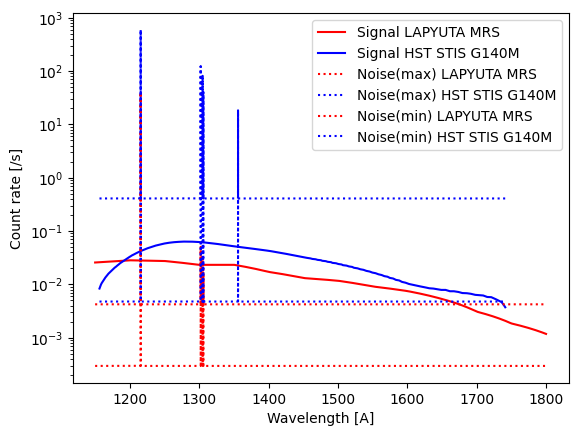

In [9]:
plt.plot(lap_wl, lap_s_cr, 'r-', label='Signal '+lap.description)
plt.plot(hst_wl, hst_s_cr, 'b-', label='Signal '+hst.description)
plt.plot(lap_wl, lap_n_cr_max, 'r:', label='Noise(max) '+lap.description)
plt.plot(hst_wl, hst_n_cr_max, 'b:', label='Noise(max) '+hst.description)
plt.plot(lap_wl, lap_n_cr_min, 'r:', label='Noise(min) '+lap.description)
plt.plot(hst_wl, hst_n_cr_min, 'b:', label='Noise(min) '+hst.description)
#plt.plot((lap_wl[0],lap_wl[-1]), (lap_n_cr, lap_n_cr), 'r:', label='Noise '+lap.description)
#plt.plot((hst_wl[0],hst_wl[-1]), (hst_n_cr, hst_n_cr), 'b:', label='Noise '+hst.description)
plt.yscale('log')
plt.ylabel('Count rate [/s]')
plt.xlabel('Wavelength [A]')
plt.legend()

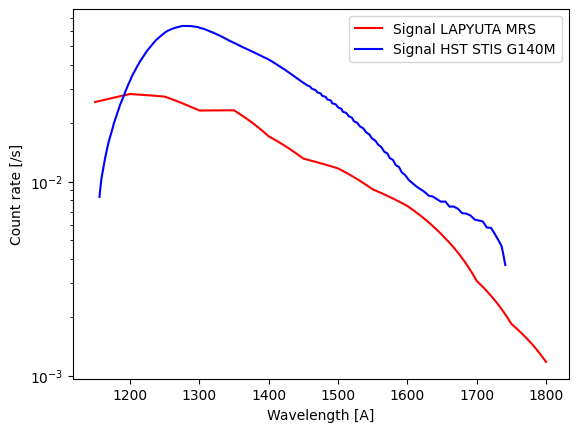

In [10]:
plt.plot(lap_wl, lap_s_cr, 'r-', label='Signal '+lap.description)
plt.plot(hst_wl, hst_s_cr, 'b-', label='Signal '+hst.description)
#plt.plot(lap_wl, lap_n_cr, 'r:', label='Noise '+lap.description)
#plt.plot(hst_wl, hst_n_cr, 'b:', label='Noise '+hst.description)
plt.yscale('log')
#plt.xlim([1215.55,1215.80])
plt.ylabel('Count rate [/s]')
plt.xlabel('Wavelength [A]')
plt.legend()

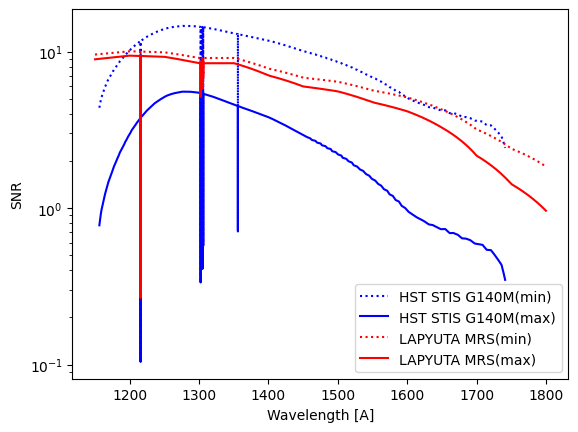

In [11]:
plt.plot(hst_wl, hst_snr_min, 'b:', label=hst.description+'(min)')
plt.plot(hst_wl, hst_snr_max, 'b-', label=hst.description+'(max)')
plt.plot(lap_wl, lap_snr_min, 'r:', label=lap.description+'(min)')
plt.plot(lap_wl, lap_snr_max, 'r-', label=lap.description+'(max)')
plt.yscale('log')
plt.ylabel('SNR')
plt.xlabel('Wavelength [A]')
plt.legend()

Limiting flux

where $C_{s} = x \sqrt{C_{s} + C_{n}}$ (S/N=x)

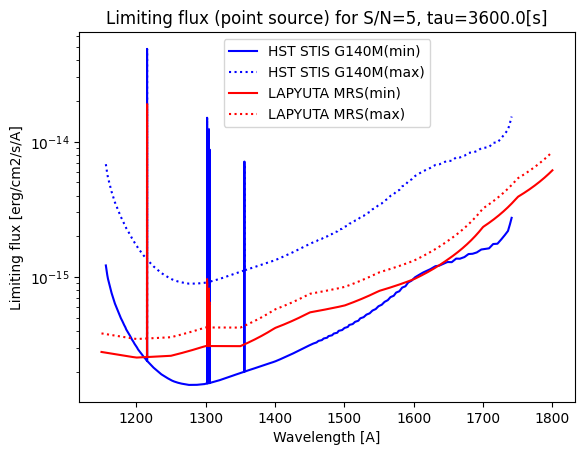

In [12]:
snr = 5

lap_ver = lap_sp * lap.n_w * tau
lap_n_c_min = lap_n_cr_min * tau
lap_n_c_max = lap_n_cr_max * tau

hst_ver = hst_sp * hst.n_w * tau
hst_n_c_min = hst_n_cr_min * tau
hst_n_c_max = hst_n_cr_max * tau

lap_lim_flux_min = (1.0 + np.sqrt(4.0*lap_n_c_min/snr**2 + 1.0)) * snr**2 / 2.0 / lap_ver
lap_lim_flux_max = (1.0 + np.sqrt(4.0*lap_n_c_max/snr**2 + 1.0)) * snr**2 / 2.0 / lap_ver
hst_lim_flux_min = (1.0 + np.sqrt(4.0*hst_n_c_min/snr**2 + 1.0)) * snr**2 / 2.0 / hst_ver
hst_lim_flux_max = (1.0 + np.sqrt(4.0*hst_n_c_max/snr**2 + 1.0)) * snr**2 / 2.0 / hst_ver

plt.plot(hst_wl, hst_lim_flux_min, '-b', label=hst.description+'(min)')
plt.plot(hst_wl, hst_lim_flux_max, ':b', label=hst.description+'(max)')
plt.plot(lap_wl, lap_lim_flux_min, '-r', label=lap.description+'(min)')
plt.plot(lap_wl, lap_lim_flux_max, ':r', label=lap.description+'(max)')

plt.yscale('log')
plt.legend()
plt.title('Limiting flux (point source) for S/N='+str(snr)+', tau='+str(tau)+'[s]')
plt.xlabel('Wavelength [A]')
plt.ylabel('Limiting flux [erg/cm2/s/A]')
plt.show()

Text(0, 0.5, 'Limiting flux [erg/cm2/s/A]')

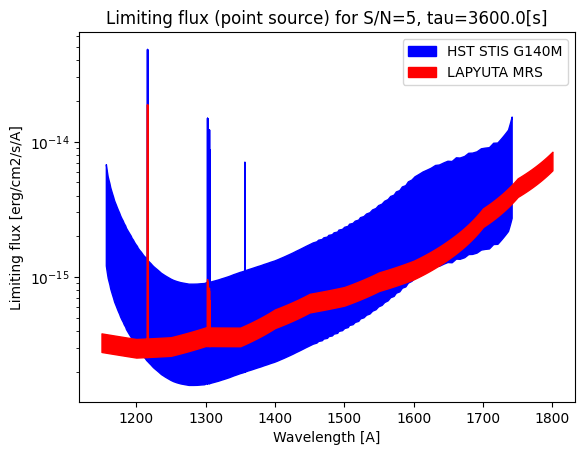

In [13]:
plt.fill_between(hst_wl, hst_lim_flux_min, hst_lim_flux_max, label=hst.description, color="blue")
plt.fill_between(lap_wl, lap_lim_flux_min, lap_lim_flux_max, label=lap.description, color="red")

plt.yscale('log')
plt.legend()
plt.title('Limiting flux (point source) for S/N='+str(snr)+', tau='+str(tau)+'[s]')
plt.xlabel('Wavelength [A]')
plt.ylabel('Limiting flux [erg/cm2/s/A]')
#plt.show()

In [14]:
#plt.plot(lap_wl, lap_lim_flux, '-r', label=lap.description)
#plt.plot(hst_wl, hst_lim_flux, '-b', label=hst.description)

#plt.yscale('log')
#plt.legend()
#plt.title('Limiting flux (point source) for S/N='+str(snr)+', tau='+str(tau)+'[s]')
#plt.xlabel('Wavelength [A]')
#plt.ylabel('Limiting flux [erg/cm2/s/A]')
#plt.xlim([1215.55,1215.80])
#plt.show()

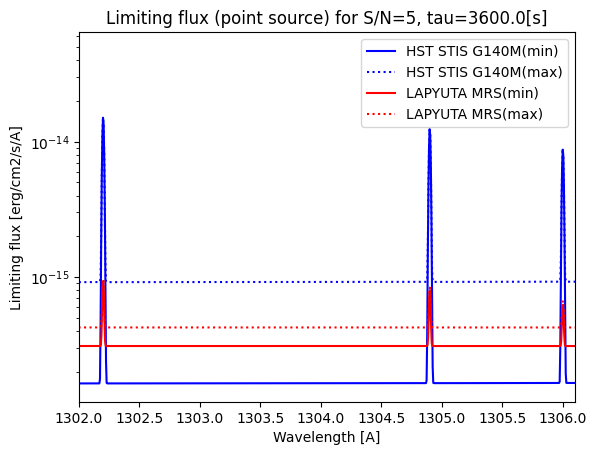

In [15]:
plt.plot(hst_wl, hst_lim_flux_min, '-b', label=hst.description+'(min)')
plt.plot(hst_wl, hst_lim_flux_max, ':b', label=hst.description+'(max)')
plt.plot(lap_wl, lap_lim_flux_min, '-r', label=lap.description+'(min)')
plt.plot(lap_wl, lap_lim_flux_max, ':r', label=lap.description+'(max)')

plt.yscale('log')
plt.legend()
plt.title('Limiting flux (point source) for S/N='+str(snr)+', tau='+str(tau)+'[s]')
plt.xlabel('Wavelength [A]')
plt.ylabel('Limiting flux [erg/cm2/s/A]')
plt.xlim([1302,1306.1])
plt.show()